In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.special import erfinv
from scipy.special import erf
import corner
%pylab inline

font = {'family' : 'normal',
       'size'   : 16}
plt.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.genfromtxt("test4_post_equal_weights.dat").T
print(data.shape)

(7, 2185)


In [3]:
def priortransform(cube):
        # definition of the parameter width, by transforming from a unit cube - switched redshift to be the last index
        # skip this, emu on unit cube
        #cube = cube.copy()
        cube[0] = cube[0] * 5.5 + 7.
        ##cube[0] = 10**(cube[0] * 5.5 - 3) # basically, this sets bounds on the mass: 7 to 12.5 -> -3 to 2 (A=1 -> 10^10)
        cube[1] = cube[1] * 10 # mu: 0 to 10
        cube[2] = cube[2] * 4.8 + 0.2 # sigma: 0.2 to 5 # NEED TO ALLOW SMALLER VALUES
        ##cube[3] = cube[3] * 10 # z: 0 to 10
        cube[3] = 10**(0.3 * erfinv(2.*(cube[3]-0.5))) # metallicity scatter: Gaussian about 0, sigma = 0.3 dex - pinch this at some limiting values - 0.001, 0.999??
        cube[4] = cube[4] * 2.  # dust extinction (doubled in birth clouds): 0 to 2.
        cube[5] = 10**(cube[5]) - 1. # log-spaced redshift sampling, z: 0 to 9.
        ##cube[5] = cube[5] # z: 0 to 9. The log spacing is set earlier, so we just output the same value
        return cube
    
def untransform(cube):
        cube[0] = (cube[0] -7.) /  5.5
        cube[1] = cube[1] / 10 # mu: 0 to 10
        cube[2] = (cube[2] - 0.2) / 4.8 # sigma: 0.2 to 5 
        cube[3] = erf(np.log(cube[3]) / 0.3)/2. + 0.5 # metallicity scatter: Gaussian about 0, sigma = 0.3 dex - pinch this at some limiting values - 0.001, 0.999??
        cube[4] = cube[4] / 2.  # dust extinction (doubled in birth clouds): 0 to 2.
        cube[5] = np.log(cube[5] + 1.) # log-spaced redshift sampling, z: 0 to 9.
        return cube

In [4]:
# convert unit cube into physical values
samples = np.zeros((6, data.shape[1]))
for i in range(data.shape[1]):
    samples[:, i] = priortransform(data[:6,i])
print(samples)

[[9.63333838 9.60576463 9.46721379 ... 9.59508305 9.57886615 9.60426693]
 [4.54086745 3.58238384 4.21841079 ... 7.11855235 6.82146018 6.65918119]
 [1.09140439 0.42855801 0.2735435  ... 0.62247558 0.65306236 0.51772854]
 [0.96503493 0.68741299 0.52298135 ... 0.57439609 0.50341882 0.5981824 ]
 [0.32488085 0.55624511 0.62751255 ... 0.93235567 0.87868461 0.9360074 ]
 [1.04903216 1.09055422 1.07082591 ... 1.16482239 1.15380881 1.16186257]]


/home/will/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


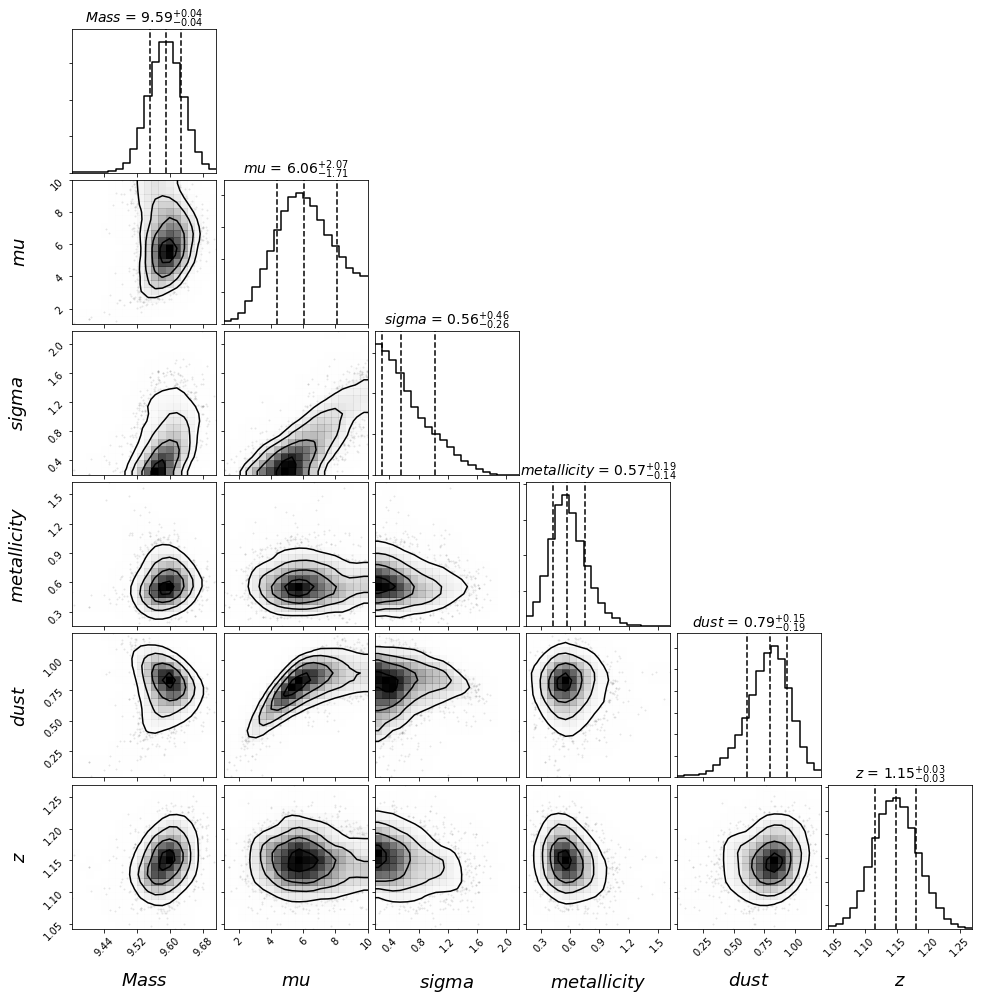

In [9]:
# first plot it in unit cube coords.
figure = corner.corner(samples.T, smooth=1., smooth1d=1.,
                       labels=[r"$Mass$", r"$mu$", r"$sigma$", r"$metallicity$", r"$dust$", r"$z$"],
                       quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 14}, 
                       label_kwargs={"fontsize":18})


In [10]:
figure.savefig("corner_multinest_4.pdf")

/home/will/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
